In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 8.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import yfinance as yf
import matplotlib.pyplot as plt

In [11]:
d_ind = {'^GSPC' :'S&P', '^IXIC': 'NASDAQ', '^NYA': 'NYSE', '^DJI': 'Dow Jones'}
stock_list=[]
for s in d_ind.keys():
    tickerData = yf.Ticker(s)
    tickerDf1 = tickerData.history(period='1d', start='2012-03-17', end='2022-03-17')
    tickerDf1.to_csv(d_ind[s] +'.csv', index=False)
    tickerDf1['ticker'] = d_ind[s]
    stock_list.append(tickerDf1)

In [12]:
msi_hist = pd.concat(stock_list, axis = 0)

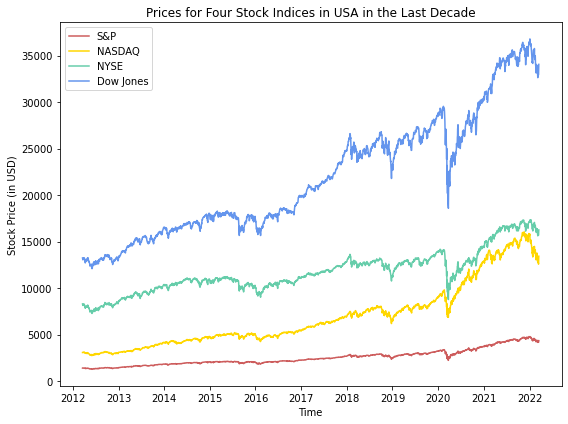

In [37]:
fig, axes = plt.subplots(figsize=(8, 6))
colors = ['indianred', 'gold', 'mediumaquamarine', 'cornflowerblue']

for i, k in enumerate(d_ind.keys()):
    d = msi_hist.loc[msi_hist['ticker'] == d_ind[k]]
    plt.plot(d.index, d['Close'], color=colors[i], label = d_ind[k])
    plt.legend()

plt.xlabel('Time')
plt.ylabel('Stock Price (in USD)')
plt.title('Prices for Four Stock Indices in USA in the Last Decade')    
fig.tight_layout()

plt.show()